<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/CDAs/CDA_continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [1]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import scipy.stats as stats
import numpy as np

In [6]:
get_data = pd.read_csv('fruitstore_saleshistory.csv')
get_data

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705566,2018-06-30,토,6,26,146297344,정상회원,수산,건어물,멸치류,국물멸치(300g),1.0,수지구,성복동,여,51.0,50대,9189,매장A,NaN,17:56
705567,2018-06-30,토,6,26,1532985472,정상회원,수산,해조,미역/다시마,자른다시마(100g),1.0,수지구,동천동,여,63.0,60대,5169,매장A,NaN,14:37
705568,2018-06-30,토,6,26,1532985472,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,수지구,동천동,여,63.0,60대,7466,매장A,NaN,14:37
705569,2018-06-30,토,6,26,1209779776,정상회원,간식,과자,스낵,하늘바다새우(60g),1.0,수지구,동천동,여,41.0,40대,3542,매장A,NaN,18:04


## 이상치, 결측치 확인


### 결측치 확인

In [7]:
get_data.isnull().sum()
# 반품 원거래 일자의 숫자가 800개정도이므로 반품_원거래일자에 결측치가 있는것은 정상(반품한 제품)

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               5
연령              33
연령대             33
구매금액             0
구매매장             0
반품_원거래일자    694337
구매시각             0
dtype: int64

In [8]:
get_data=get_data.dropna(subset=['성별','연령','연령대','구매금액','구매매장','구매시각'])
# 나머지 결측치 제거

### 이상치 확인

In [9]:
get_data['성별'].unique()
# 성별 정상

array(['여', '남'], dtype=object)

In [10]:
get_data['연령대'].unique()
# 연령대 정상

array(['40대', '30대이하', '50대', '60대', '70대이상'], dtype=object)

In [11]:
get_data['물품대분류'].unique()
# 물품분류 정상

array(['과실', '채소', '축산물', '반찬', '간식', '수산', '주곡', '양념/가루', '음료', '생활용품',
       '서류', '건강', '잡곡', '기타', '주류'], dtype=object)

## X (연속형) / Y (연속형)

### 판매된 수량(X)이 각 과일 유형의 단가(Y)와 어떤 관계가 있습니까?
- 분석 방법: 수량과 가격 사이의 관계의 강도와 방향을 측정하기 위한 피어슨 또는 스피어만


In [12]:
get_data_fr_cu = get_data[['물품대분류','물품소분류','구매금액','구매수량','반품_원거래일자']].query('물품대분류 == "과실" & 반품_원거래일자.isna()')
get_data_fr_cu
# 반품을 제외한 데이터 추출

,물품대분류,물품소분류,구매금액,구매수량,반품_원거래일자
0,과실,사과,22207,1.0,NaN
30,과실,땅콩,16273,1.0,NaN
62,과실,건대추,22973,1.0,NaN
132,과실,귤(조생),11104,1.0,NaN
187,과실,귤(조생),11104,1.0,NaN
...,...,...,...,...,...
705278,과실,블루베리,30248,1.0,NaN
705354,과실,황매실,111036,2.0,NaN
705429,과실,산딸기,35608,3.0,NaN
705467,과실,사과,13592,1.0,NaN


In [13]:
get_data_fr_cu.query('구매수량 == 0')

,물품대분류,물품소분류,구매금액,구매수량,반품_원거래일자
25340,과실,사과,0,0.0,NaN
27110,과실,사과,0,0.0,NaN
27113,과실,사과,0,0.0,NaN
27117,과실,사과,0,0.0,NaN
48788,과실,사과,0,0.0,NaN
114657,과실,배,0,0.0,NaN
162524,과실,사과,0,0.0,NaN
223751,과실,사과,0,0.0,NaN
233048,과실,배,0,0.0,NaN
238342,과실,밤,0,0.0,NaN


In [24]:
get_data_fr_cu['구매수량'].unique()

array([ 1.  ,  3.  ,  2.  ,  5.  ,  0.25,  0.5 , -1.5 ,  4.  , 10.  ,
       -2.  ,  6.  , 13.  ,  8.  ,  0.4 ,  0.2 , 17.  ,  0.6 ,  0.1 ,
        0.32,  0.44,  1.5 ,  0.31, -0.44, -0.7 , -0.5 ,  7.  ])

In [14]:
get_data_fr_cu = get_data_fr_cu.drop(get_data_fr_cu[get_data_fr_cu['구매수량'] == 0].index)
get_data_fr_cu.query('구매수량 == 0')

,물품대분류,물품소분류,구매금액,구매수량,반품_원거래일자


In [15]:
get_data_fr_cu = get_data_fr_cu.drop(get_data_fr_cu[get_data_fr_cu['구매수량'] == -1].index)
get_data_fr_cu.query('구매수량 == -1')

,물품대분류,물품소분류,구매금액,구매수량,반품_원거래일자


In [16]:
get_data_fr_cu['과실가격'] = get_data_fr_cu.apply(lambda x: x['구매금액']/x['구매수량'], axis=1)
get_data_fr_cu

,물품대분류,물품소분류,구매금액,구매수량,반품_원거래일자,과실가격
0,과실,사과,22207,1.0,NaN,22207.000000
30,과실,땅콩,16273,1.0,NaN,16273.000000
62,과실,건대추,22973,1.0,NaN,22973.000000
132,과실,귤(조생),11104,1.0,NaN,11104.000000
187,과실,귤(조생),11104,1.0,NaN,11104.000000
...,...,...,...,...,...,...
705278,과실,블루베리,30248,1.0,NaN,30248.000000
705354,과실,황매실,111036,2.0,NaN,55518.000000
705429,과실,산딸기,35608,3.0,NaN,11869.333333
705467,과실,사과,13592,1.0,NaN,13592.000000


In [48]:
get_data_fr_cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18695 entries, 0 to 705478
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   물품대분류     18695 non-null  object 
 1   물품소분류     18695 non-null  object 
 2   구매금액      18695 non-null  int64  
 3   구매수량      18695 non-null  float64
 4   반품_원거래일자  0 non-null      float64
 5   과실가격      18695 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1022.4+ KB


In [44]:
# 연관 계수 확인
get_data_fr_cu[['구매수량','과실가격']].corr()

,구매수량,과실가격
구매수량,1.000000,-0.094037
과실가격,-0.094037,1.000000


### 정규분포 확인

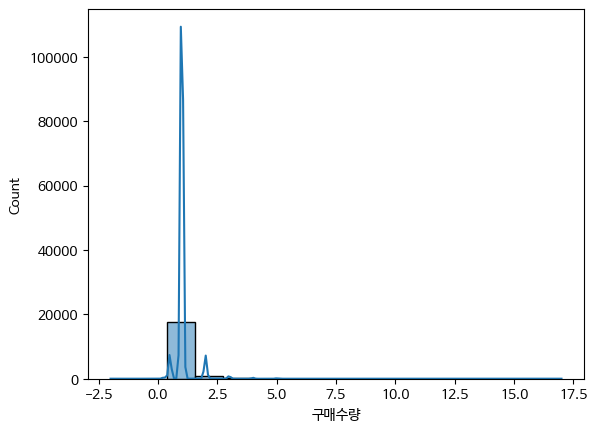

In [45]:
sns.histplot(data=get_data_fr_cu,x='구매수량',kde=True)
plt.show()

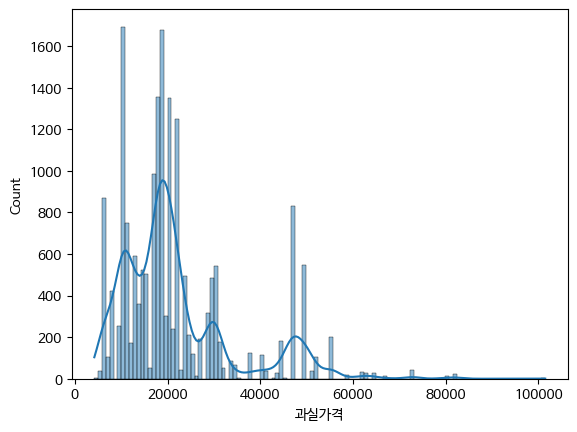

In [46]:
sns.histplot(data=get_data_fr_cu,x='과실가격',kde=True)
plt.show()

- 쓰읍... 이건 누가 봐도 정규분포를 안따를꺼같은데 일단 확인

- 데이터 갯수가 5000개 이상이므로 andersonr test 사용

In [50]:
stats.anderson(get_data_fr_cu['구매수량'])
# statistic의 값이 5147.91이므로 유의수준 1%의 1.092를 상회하므로 귀무가설 기각

AndersonResult(statistic=5147.917855479016, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.0435720780957474, scale=0.39826877796898524)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [51]:
stats.anderson(get_data_fr_cu['과실가격'])
# statistic의 값이 909.32이므로 유의수준 1%의 1.092를 상회하므로 귀무가설 기각

AndersonResult(statistic=909.3297886573491, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=21727.80659832158, scale=12583.511741599386)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

- 두개의 값 모두 정규분포를 따르지 않으므로 spearmanr test 사용

In [53]:
stats.spearmanr(get_data_fr_cu['과실가격'],get_data_fr_cu['구매수량'])

SignificanceResult(statistic=-0.22191736991106484, pvalue=2.6785119905448015e-207)

### 분석 결과 (기준 :  pvalue=2.679)
- 통계적 결론 :
  + pvalue가 0.05보다 크므로 대립가설 성립
  + 상관계수는 약반비례관계 (-0.094037)
- 사실 결론 :
  + 과일의 가격에 따라 구매 갯수의 변화가 있다.